## Understanding the data

Inporting the libraries

In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd

### Importing csv

In [161]:
bikes_df = pd.read_csv('day.csv')

In [122]:
bikes_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [123]:
bikes_df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [124]:
bikes_df.count()

instant       730
dteday        730
season        730
yr            730
mnth          730
holiday       730
weekday       730
workingday    730
weathersit    730
temp          730
atemp         730
hum           730
windspeed     730
casual        730
registered    730
cnt           730
dtype: int64

In [125]:
bikes_df.shape

(730, 16)

In [126]:
bikes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


### Data preparation for modelling

In [162]:
#convert weathersit values to string
bikes_df['weathersit'] = bikes_df['weathersit'].apply(lambda x : 'clear' if x == 1 else 'cloudy' if x == 2 else 'light precipitation' if x == 3 else 'heavy precipitation')

In [163]:
#convert year 0 / 1 to '2018' / '2019'
bikes_df['yr'] = bikes_df['yr'].apply(lambda x : '2019' if x == 1 else '2018')

In [164]:
# let's map season and months vale to their names
seasons_map = {1:"spring", 2:"summer", 3:"fall", 4:"winter"}
mnths_map = {1:"Jan", 2:"Feb", 3:"Mar", 4:"Apr", 5:"May", 6:"Jun", 7:"Jul", 8:"Aug", 9:"Sep", 10:"Oct", 11:"Nov", 12:"Dec"}
bikes_df['mnth'] = bikes_df['mnth'].apply(lambda x : mnths_map[x])
bikes_df['season'] = bikes_df['season'].apply(lambda x : seasons_map[x])

In [130]:
#viewing the modified data
bikes_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,2018,Jan,0,6,0,cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,2018,Jan,0,0,0,cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,2018,Jan,0,1,1,clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,2018,Jan,0,2,1,clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,2018,Jan,0,3,1,clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [131]:
#verifying the column types change
bikes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    object 
 3   yr          730 non-null    object 
 4   mnth        730 non-null    object 
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    object 
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(7), object(5)
memory usage: 91.4+ KB


#### Dummy variables

In [165]:
# Get the dummy variables for the feature 'weathersit' and store it in a new variable - 'weather_dummy_vars_df'

weather_dummy_vars_df = pd.get_dummies(bikes_df['weathersit'])

# Check what the dataset 'status' looks like
weather_dummy_vars_df.head()

,clear,cloudy,light precipitation
0,0,1,0
1,0,1,0
2,1,0,0
3,1,0,0
4,1,0,0


##### we find that there are only 3 weather states here. Need to check unique weather values in the dataset to confirm

In [133]:
# check unique values of weathersit column
bikes_df['weathersit'].unique()
# no entry is there corresponding to season 4, Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

array(['cloudy', 'clear', 'light precipitation'], dtype=object)

we can remove one column for season , as season 1 and 2 value 0 will imply season 3, and non zero value of season 1 or 2 will imply season 3 with value 0

In [166]:
# Let's drop the first column from status df using 'drop_first = True'
weather_dummy_vars_df = pd.get_dummies(bikes_df['weathersit'], drop_first = True)

# Add the results to the original bikes_df dataframe
bikes_df = pd.concat([bikes_df, weather_dummy_vars_df], axis = 1)

#check updated dataframe
bikes_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,cloudy,light precipitation
0,1,01-01-2018,spring,2018,Jan,0,6,0,cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985,1,0
1,2,02-01-2018,spring,2018,Jan,0,0,0,cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801,1,0
2,3,03-01-2018,spring,2018,Jan,0,1,1,clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349,0,0
3,4,04-01-2018,spring,2018,Jan,0,2,1,clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562,0,0
4,5,05-01-2018,spring,2018,Jan,0,3,1,clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600,0,0


In [167]:
# Drop 'weathersit' as we have created the dummies for it
bikes_df.drop(['weathersit'], axis = 1, inplace = True)

bikes_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,cloudy,light precipitation
0,1,01-01-2018,spring,2018,Jan,0,6,0,14.110847,18.18125,80.5833,10.749882,331,654,985,1,0
1,2,02-01-2018,spring,2018,Jan,0,0,0,14.902598,17.68695,69.6087,16.652113,131,670,801,1,0
2,3,03-01-2018,spring,2018,Jan,0,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,0,0
3,4,04-01-2018,spring,2018,Jan,0,2,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,0,0
4,5,05-01-2018,spring,2018,Jan,0,3,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,0,0


In [168]:
# Get the dummy variables for the feature 'yr' and store it in a new variable - 'yr_vars_df'

yr_dummy_vars_df = pd.get_dummies(bikes_df['yr'])

# Check what the dataset 'status' looks like
yr_dummy_vars_df.head()

,2018,2019
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


 we can remove one column for year, as year 1 (2019) value 1 will imply that the other year (2018) is not present. 

In [169]:
# Let's drop the first column from year df using 'drop_first = True'
yr_dummy_vars_df = pd.get_dummies(bikes_df['yr'], drop_first = True)

# Add the results to the bikes_df dataframe
bikes_df = pd.concat([bikes_df, yr_dummy_vars_df], axis = 1)

#check updated dataframe
bikes_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,cloudy,light precipitation,2019
0,1,01-01-2018,spring,2018,Jan,0,6,0,14.110847,18.18125,80.5833,10.749882,331,654,985,1,0,0
1,2,02-01-2018,spring,2018,Jan,0,0,0,14.902598,17.68695,69.6087,16.652113,131,670,801,1,0,0
2,3,03-01-2018,spring,2018,Jan,0,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,0,0,0
3,4,04-01-2018,spring,2018,Jan,0,2,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,0,0,0
4,5,05-01-2018,spring,2018,Jan,0,3,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,0,0,0


In [170]:
# Drop 'yr' as we have created the dummies for it
bikes_df.drop(['yr'], axis = 1, inplace = True)

bikes_df.head()

,instant,dteday,season,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,cloudy,light precipitation,2019
0,1,01-01-2018,spring,Jan,0,6,0,14.110847,18.18125,80.5833,10.749882,331,654,985,1,0,0
1,2,02-01-2018,spring,Jan,0,0,0,14.902598,17.68695,69.6087,16.652113,131,670,801,1,0,0
2,3,03-01-2018,spring,Jan,0,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,0,0,0
3,4,04-01-2018,spring,Jan,0,2,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,0,0,0
4,5,05-01-2018,spring,Jan,0,3,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,0,0,0


'cnt' is the target variable, 'casual' and 'registered' columns can be safely removed from dataset

In [171]:
bikes_df.drop(['casual', 'registered'], axis = 1, inplace = True)

bikes_df.drop(['dteday'], axis = 1, inplace = True)

# we can also drop the dteday column as it is covered by mnth weekday and yr columns
bikes_df.head()


,instant,season,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,cloudy,light precipitation,2019
0,1,spring,Jan,0,6,0,14.110847,18.18125,80.5833,10.749882,985,1,0,0
1,2,spring,Jan,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,0
2,3,spring,Jan,0,1,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,0
3,4,spring,Jan,0,2,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,0
4,5,spring,Jan,0,3,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,0


We can also make dummy variables for weekday , but firstlets check if there seems to be any correlation on weekday vs count

In [172]:
tmp_weekday_cnt_df = bikes_df[['weekday', 'cnt']]

In [173]:
tmp_weekday_cnt_df.groupby('weekday')['cnt'].median()

weekday
0    4334.0
1    4359.0
2    4576.5
3    4656.0
4    4721.0
5    4601.5
6    4521.0
Name: cnt, dtype: float64

Seems like there is no significant variation in days of the week vs count... trying to check trend through graph as well

In [142]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

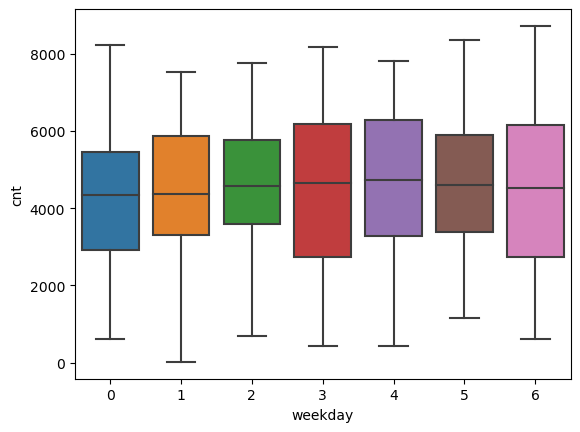

In [143]:
sns.boxplot(x = tmp_weekday_cnt_df['weekday'], y = tmp_weekday_cnt_df['cnt'])
plt.show()

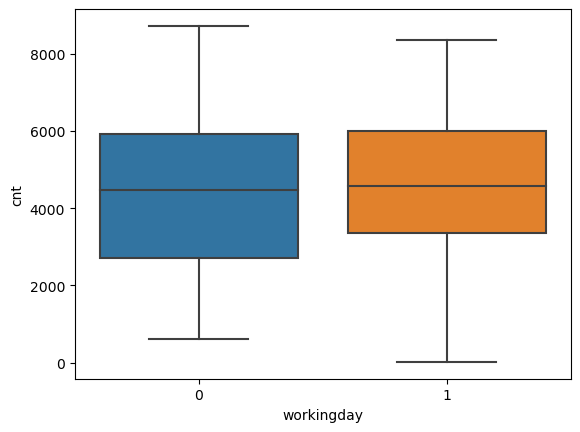

In [144]:
sns.boxplot(x = bikes_df['workingday'], y = bikes_df['cnt'])
plt.show()

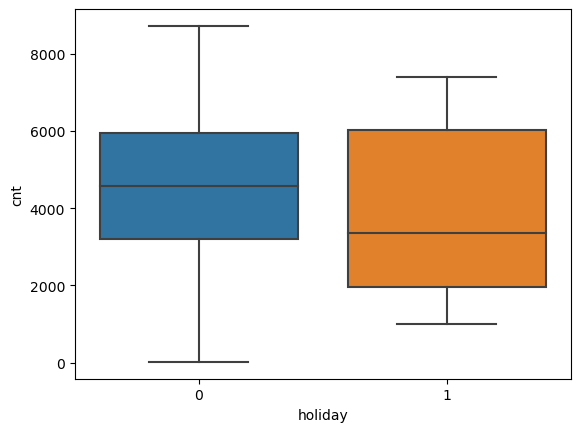

In [145]:
sns.boxplot(x = bikes_df['holiday'], y = bikes_df['cnt'])
plt.show()

Impact of it being a weekend or a weekday or which day of the weeks seems to be having very less effect as median value of count is similar as shown in the plots and table data...
Hence for now removing the weekday column from dataset

In [146]:
bikes_df.drop(['weekday'], axis = 1, inplace = True)

However impact of it being a holiday or not a holiday is significant, as shown in boxplot above. 

In [147]:
bikes_df.head()

,instant,season,mnth,holiday,workingday,temp,atemp,hum,windspeed,cnt,cloudy,light precipitation,2019
0,1,spring,Jan,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,0
1,2,spring,Jan,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,0
2,3,spring,Jan,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,0
3,4,spring,Jan,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,0
4,5,spring,Jan,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,0


In [174]:
# this is s. no, so would not be needed
bikes_df.drop(['instant'], axis = 1, inplace = True)

In [175]:
bikes_df.head()

,season,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,cloudy,light precipitation,2019
0,spring,Jan,0,6,0,14.110847,18.18125,80.5833,10.749882,985,1,0,0
1,spring,Jan,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,0
2,spring,Jan,0,1,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,0
3,spring,Jan,0,2,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,0
4,spring,Jan,0,3,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,0


We will also make dummy variable for season and mnth because their values are more on category side...

In [176]:
# Let's drop the first column from season df using 'drop_first = True'
season_dummy_vars_df = pd.get_dummies(bikes_df['season'], drop_first = True)

# Add the results to the bikes_df dataframe
bikes_df = pd.concat([bikes_df, season_dummy_vars_df], axis = 1)

# Let's drop the first column from mnth df using 'drop_first = True'
mnth_dummy_vars_df = pd.get_dummies(bikes_df['mnth'], drop_first = True)

# Add the results to the bikes_df dataframe
bikes_df = pd.concat([bikes_df, mnth_dummy_vars_df], axis = 1)

#check updated dataframe
bikes_df.head()

,season,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,spring,Jan,0,6,0,14.110847,18.18125,80.5833,10.749882,985,...,0,0,1,0,0,0,0,0,0,0
1,spring,Jan,0,0,0,14.902598,17.68695,69.6087,16.652113,801,...,0,0,1,0,0,0,0,0,0,0
2,spring,Jan,0,1,1,8.050924,9.47025,43.7273,16.636703,1349,...,0,0,1,0,0,0,0,0,0,0
3,spring,Jan,0,2,1,8.200000,10.60610,59.0435,10.739832,1562,...,0,0,1,0,0,0,0,0,0,0
4,spring,Jan,0,3,1,9.305237,11.46350,43.6957,12.522300,1600,...,0,0,1,0,0,0,0,0,0,0


In [177]:
#now that we have created dummy variables for season and mnth, we can remove the season and mnth columns
bikes_df.drop(['season'], axis = 1, inplace = True)
bikes_df.drop(['mnth'], axis = 1, inplace = True)
bikes_df.head()

,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,cloudy,light precipitation,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,6,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,1,0,0,0,0,0,0,0
2,0,1,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,2,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,3,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,1,0,0,0,0,0,0,0


In [152]:
bikes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              730 non-null    int64  
 1   workingday           730 non-null    int64  
 2   temp                 730 non-null    float64
 3   atemp                730 non-null    float64
 4   hum                  730 non-null    float64
 5   windspeed            730 non-null    float64
 6   cnt                  730 non-null    int64  
 7   cloudy               730 non-null    uint8  
 8   light precipitation  730 non-null    uint8  
 9   2019                 730 non-null    uint8  
 10  spring               730 non-null    uint8  
 11  summer               730 non-null    uint8  
 12  winter               730 non-null    uint8  
 13  Aug                  730 non-null    uint8  
 14  Dec                  730 non-null    uint8  
 15  Feb                  730 non-null    uin

### Splitting the data into train and test sets

In [178]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively

bikes_df_train, bikes_df_test = train_test_split(bikes_df, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling the features
 We will use minmax scaling

In [179]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [180]:
# Apply scaler() to all the columns except the 'category' and 'dummy' variables
scalable_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

bikes_df_train[scalable_vars] = scaler.fit_transform(bikes_df_train[scalable_vars])

bikes_df_train.head()

,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,cloudy,light precipitation,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
653,0,2,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,0,0,0,0,0,0,0,0,1,0
576,0,2,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,1,0,0,0,0,0,0
426,0,6,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,0,0,1,0,0,0,0
728,0,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,0,...,1,0,0,0,0,0,0,0,0,0
482,0,6,0,0.395666,0.391735,0.504508,0.188475,0.482973,1,0,...,0,0,0,0,0,0,0,0,0,0


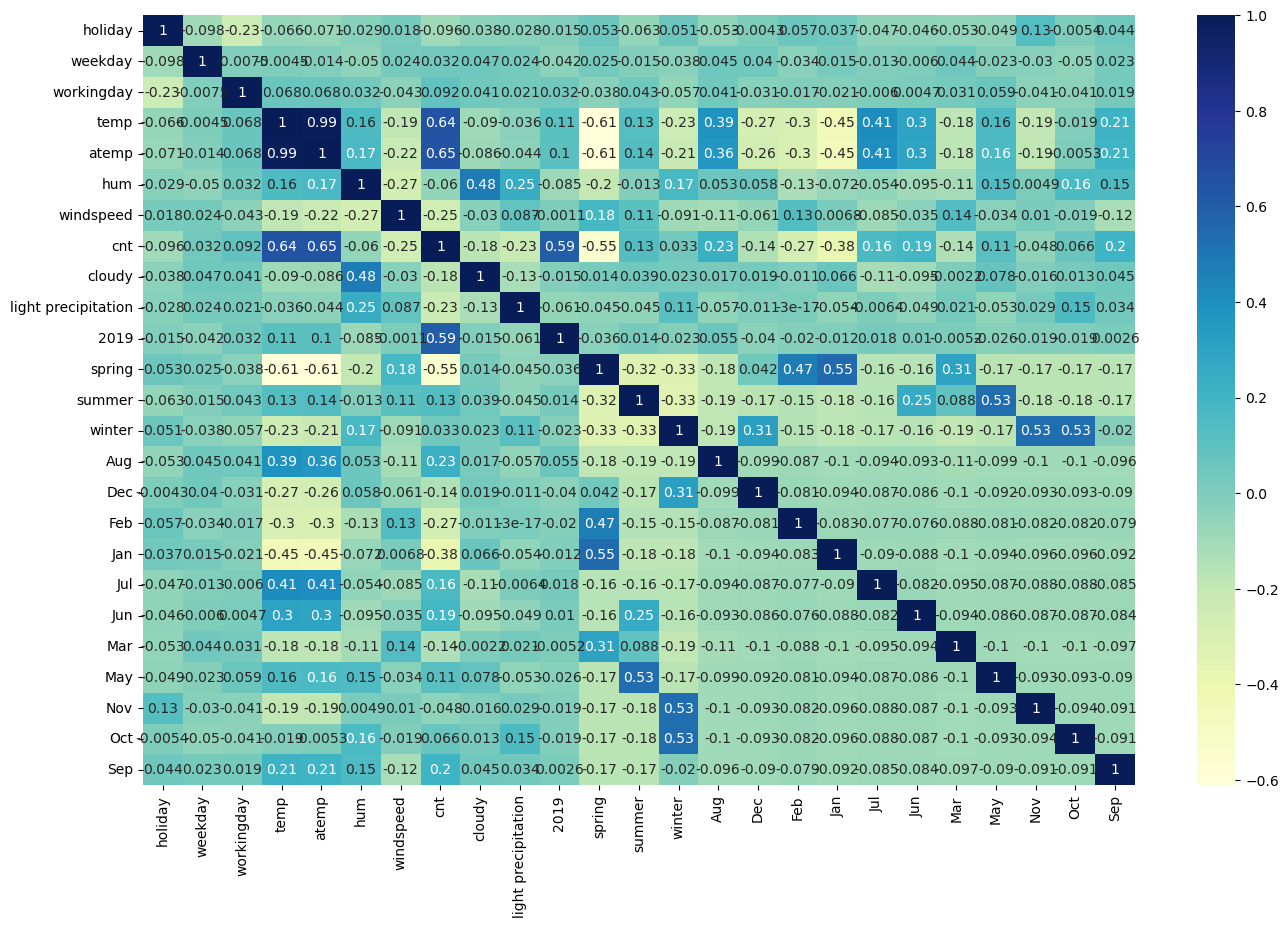

In [181]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(bikes_df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

since atemp has the highest correlation with cnt, we are going to start building model with variable as atemp and target as cnt

In [182]:
#extracting y_train
y_train = bikes_df_train.pop('cnt')

In [183]:
#X_train 
X_train = bikes_df_train

In [192]:
#verifying X-train
X_train.head()

,holiday,weekday,workingday,temp,atemp,hum,windspeed,cloudy,light precipitation,2019,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
653,0,2,1,0.509887,0.501133,0.575354,0.300794,0,0,1,...,0,0,0,0,0,0,0,0,1,0
576,0,2,1,0.815169,0.766351,0.725633,0.264686,0,0,1,...,0,0,0,1,0,0,0,0,0,0
426,0,6,0,0.442393,0.438975,0.640189,0.255342,1,0,1,...,0,0,0,0,0,1,0,0,0,0
728,0,0,0,0.245101,0.200348,0.498067,0.663106,0,0,1,...,1,0,0,0,0,0,0,0,0,0
482,0,6,0,0.395666,0.391735,0.504508,0.188475,1,0,1,...,0,0,0,0,0,0,0,0,0,0


In [196]:
#verifying X-train
y_train.head()

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: cnt, dtype: float64

### Building our model
This time, we will be using the LinearRegression function from SciKit Learn for its compatibility with RFE (which is a utility from sklearn)

#### RFE
Recursive feature elimination

In [198]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [200]:
# Running RFE with the output number of the variable equal to 20
lm = LinearRegression()
lm.fit(X_train, y_train)
# running RFE
rfe = RFE(lm, n_features_to_select=20)             
rfe = rfe.fit(X_train, y_train)

In [201]:
#checking the variables processed
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('holiday', True, 1),
 ('weekday', False, 2),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('cloudy', True, 1),
 ('light precipitation', True, 1),
 ('2019', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Aug', True, 1),
 ('Dec', True, 1),
 ('Feb', True, 1),
 ('Jan', True, 1),
 ('Jul', True, 1),
 ('Jun', False, 5),
 ('Mar', False, 4),
 ('May', True, 1),
 ('Nov', True, 1),
 ('Oct', False, 3),
 ('Sep', True, 1)]

In [203]:
#checking selected columns
selected_col = X_train.columns[rfe.support_]
selected_col

Index(['holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed', 'cloudy',
       'light precipitation', '2019', 'spring', 'summer', 'winter', 'Aug',
       'Dec', 'Feb', 'Jan', 'Jul', 'May', 'Nov', 'Sep'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [204]:
#creating rfe model on basis of selected columns
X_train_rfe = X_train[selected_col]

In [205]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [206]:
# Running the linear model
lm = sm.OLS(y_train, X_train_rfe).fit() 

In [207]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     136.6
Date:                Wed, 12 Jul 2023   Prob (F-statistic):          1.60e-185
Time:                        19:28:36   Log-Likelihood:                 519.21
No. Observations:                 510   AIC:                            -996.4
Df Residuals:                     489   BIC:                            -907.5
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.3209    

#### we will need to remove variables with p value > 0.05 since they are not higly relavant compared to other variables.

In [208]:
# removing columns workingday, atemp, spring , summer, aug, dec, feb ,jul,may
# first we will have to remove atemp and see the fitment after that
X_train_v2 = X_train_rfe.drop(["atemp"], axis = 1)


#### rebuilding the model without atemp

In [209]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_v2_with_const = sm.add_constant(X_train_v2)

In [210]:
# Running the linear model
lm_v2 = sm.OLS(y_train, X_train_v2_with_const).fit() 

In [212]:
#Let's see the summary of our linear model
print(lm_v2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     144.1
Date:                Wed, 12 Jul 2023   Prob (F-statistic):          1.35e-186
Time:                        19:51:52   Log-Likelihood:                 519.18
No. Observations:                 510   AIC:                            -998.4
Df Residuals:                     490   BIC:                            -913.7
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.3209    

In [213]:
#will need to remove aug month as it has next highest pvalue
X_train_v3 = X_train_v2_with_const.drop(["Aug"], axis = 1)

#### repeating the steps , building the model and fitting

In [214]:
X_train_v3_with_const = sm.add_constant(X_train_v3)
# Running the linear model
lm_v3 = sm.OLS(y_train, X_train_v3_with_const).fit() 
#Let's see the summary of our linear model
print(lm_v3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     152.1
Date:                Wed, 12 Jul 2023   Prob (F-statistic):          1.48e-187
Time:                        19:56:44   Log-Likelihood:                 518.85
No. Observations:                 510   AIC:                            -999.7
Df Residuals:                     491   BIC:                            -919.2
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.3317    

In [215]:
#will need to remove May month as it has next highest pvalue
X_train_v4 = X_train_v3_with_const.drop(["May"], axis = 1)
X_train_v4_with_const = sm.add_constant(X_train_v4)
# Running the linear model
lm_v4 = sm.OLS(y_train, X_train_v4_with_const).fit() 
#Let's see the summary of our linear model
print(lm_v4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     160.7
Date:                Wed, 12 Jul 2023   Prob (F-statistic):          2.83e-188
Time:                        20:03:18   Log-Likelihood:                 517.91
No. Observations:                 510   AIC:                            -999.8
Df Residuals:                     492   BIC:                            -923.6
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.3209    

In [216]:
#will need to remove Feb month as it has next highest pvalue
X_train_v5 = X_train_v4_with_const.drop(["Feb"], axis = 1)
X_train_v5_with_const = sm.add_constant(X_train_v5)
# Running the linear model
lm_v5 = sm.OLS(y_train, X_train_v5_with_const).fit() 
#Let's see the summary of our linear model
print(lm_v5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     169.9
Date:                Wed, 12 Jul 2023   Prob (F-statistic):          8.97e-189
Time:                        20:04:36   Log-Likelihood:                 516.41
No. Observations:                 510   AIC:                            -998.8
Df Residuals:                     493   BIC:                            -926.8
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.3091    

In [217]:
#will need to remove Feb month as it has next highest pvalue
X_train_v6 = X_train_v5_with_const.drop(["workingday"], axis = 1)
X_train_v6_with_const = sm.add_constant(X_train_v6)
# Running the linear model
lm_v6 = sm.OLS(y_train, X_train_v6_with_const).fit() 
#Let's see the summary of our linear model
print(lm_v6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.2
Date:                Wed, 12 Jul 2023   Prob (F-statistic):          3.34e-189
Time:                        20:05:38   Log-Likelihood:                 514.72
No. Observations:                 510   AIC:                            -997.4
Df Residuals:                     494   BIC:                            -929.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.3202    

### Now no variable has p > 0.05 , so now we can proceed with further steps

In [219]:
X_train_v6_with_const = X_train_v6_with_const.drop(['const'], axis=1)

In [220]:
# calculate VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_v6_with_const
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,hum,30.94
1,temp,17.80
3,windspeed,4.72
7,spring,4.37
9,winter,4.06
8,summer,2.81
4,cloudy,2.32
6,2019,2.09
13,Nov,1.83
11,Jan,1.75


 #### We will have to remove hum and temp since their VIF is > 5

In [221]:
X_train_v7 = X_train_v6_with_const.drop(["hum"], axis = 1)
X_train_v7_with_const = sm.add_constant(X_train_v7)
# Running the linear model
lm_v7 = sm.OLS(y_train, X_train_v7_with_const).fit() 
#Let's see the summary of our linear model
print(lm_v7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     185.4
Date:                Wed, 12 Jul 2023   Prob (F-statistic):          1.57e-186
Time:                        20:14:02   Log-Likelihood:                 505.61
No. Observations:                 510   AIC:                            -981.2
Df Residuals:                     495   BIC:                            -917.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2466    

In [235]:
X_train_v8 = X_train_v7_with_const.drop(["temp"], axis = 1)
X_train_v8_with_const = sm.add_constant(X_train_v8)
# Running the linear model
lm_v8 = sm.OLS(y_train, X_train_v8_with_const).fit() 
#Let's see the summary of our linear model
print(lm_v8.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     145.8
Date:                Wed, 12 Jul 2023   Prob (F-statistic):          5.50e-160
Time:                        20:25:17   Log-Likelihood:                 439.69
No. Observations:                 510   AIC:                            -851.4
Df Residuals:                     496   BIC:                            -792.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.5961    

In [250]:
#Jul has very high p value, hence removing it 
X_train_v9 = X_train_v8_with_const.drop(["Jul"], axis = 1)
X_train_v9_with_const = sm.add_constant(X_train_v9)
# Running the linear model
lm_v9 = sm.OLS(y_train, X_train_v9_with_const).fit() 
#Let's see the summary of our linear model
print(lm_v9.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     158.0
Date:                Wed, 12 Jul 2023   Prob (F-statistic):          6.36e-161
Time:                        22:43:01   Log-Likelihood:                 439.28
No. Observations:                 510   AIC:                            -852.6
Df Residuals:                     497   BIC:                            -797.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.5892    

In [251]:
#winter has very high p value, hence removing it 
X_train_v10 = X_train_v9_with_const.drop(["winter"], axis = 1)
X_train_v10_with_const = sm.add_constant(X_train_v10)
# Running the linear model
lm_v10 = sm.OLS(y_train, X_train_v10_with_const).fit() 
#Let's see the summary of our linear model
print(lm_v10.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     172.3
Date:                Wed, 12 Jul 2023   Prob (F-statistic):          7.42e-162
Time:                        22:43:52   Log-Likelihood:                 438.82
No. Observations:                 510   AIC:                            -853.6
Df Residuals:                     498   BIC:                            -802.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.5845    

In [252]:
# calculate VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor
# X_train_v8_with_const = X_train_v8_with_const.drop(['const'], axis=1)
vif_v2 = pd.DataFrame()
X_v2 = X_train_v10_with_const
vif_v2['Features'] = X_v2.columns
vif_v2['VIF'] = [variance_inflation_factor(X_v2.values, i) for i in range(X_v2.shape[1])]
vif_v2['VIF'] = round(vif_v2['VIF'], 2)
vif_v2 = vif_v2.sort_values(by = "VIF", ascending = False)
vif_v2

,Features,VIF
0,const,7.96
6,spring,1.85
9,Jan,1.49
7,summer,1.42
10,Nov,1.21
11,Sep,1.18
2,windspeed,1.11
8,Dec,1.11
4,light precipitation,1.04
1,holiday,1.03


### Residual Analysis of the train data
So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [253]:
y_train_cnt = lm_v10.predict(X_train_v10_with_const)
# X_train_v8_with_const.shape
# lm_v8.shape

In [254]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 0, 'Errors')

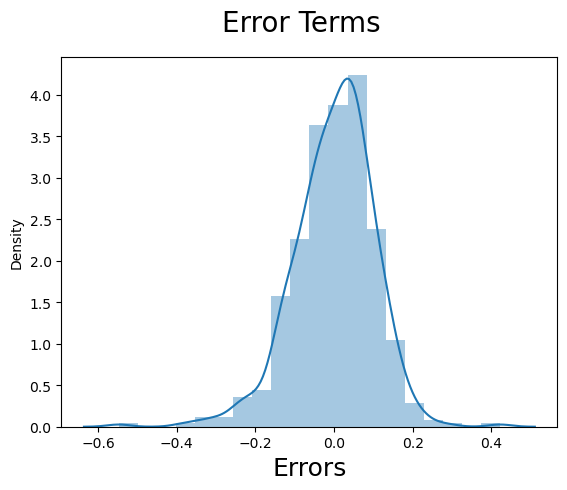

In [255]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

### Making Predictions
#### Applying the scaling on the test sets¶

In [240]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

bikes_df_test[num_vars] = scaler.transform(bikes_df_test[num_vars])

dividing into X_test and y_test

In [241]:
y_test = bikes_df_test.pop('cnt')
X_test = bikes_df_test

In [256]:
X_train_v10_with_const.columns

Index(['const', 'holiday', 'windspeed', 'cloudy', 'light precipitation',
       '2019', 'spring', 'summer', 'Dec', 'Jan', 'Nov', 'Sep'],
      dtype='object')

In [257]:
# Now let's use our model to make predictions.
X_train_v10_with_const.drop(['const'], axis = 1, inplace = True)
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_v10_with_const.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [258]:
# Making predictions
y_pred = lm_v10.predict(X_test_new)

### Model Evaluation

Text(0, 0.5, 'y_pred')

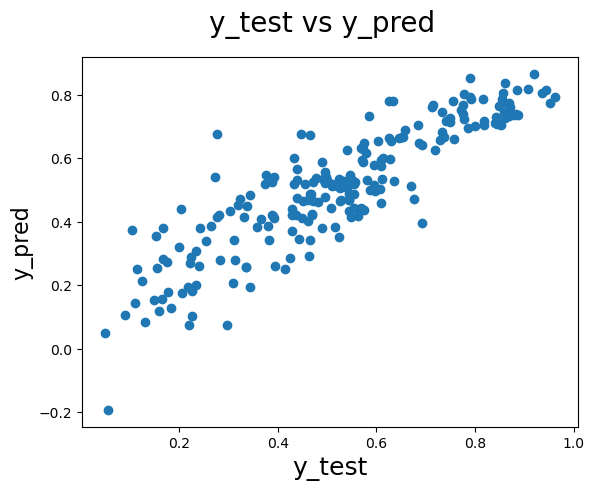

In [259]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label